<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/topic8b/topic8_intro_ML_training_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

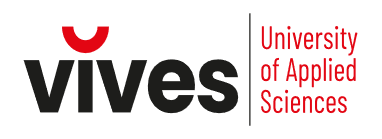<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
VIVES BUSINESS ACADEMY<br>
Academic Year 2023-2024<br>
Andy Louwyck

---



---



# **INTRODUCTION TO MACHINE LEARNING: TRAINING AND EVALUATION**

This notebook is a brief introduction to training and evaluating machine learning models with Python. We give some examples of supervised and unsupervised learning:

- classification with K Nearest Neighbors (supervised)
- classification with logistic regression (supervised)
- simple linear regression (supervised)
- polynomial regression (supervised)
- K-Means clustering (unsupervised)

We also explain how hyperparameters are fine-tuned using a validation set in order to overcome overfitting.

## **Python libraries**

We need the following libraries:
- NumPy: library for numerical computation.
- Pandas: library for analyzing structured data
- Matplotlib: library for visualizing data
- Scikit-Learn: machine learning library

As we already know, we import these libraries using the `import` command:

In [ ]:
import numpy as np  # numeric python
import pandas as pd  # python data analysis library
import matplotlib.pyplot as plt  # python library for visualizations

From Scikit-Learn we import only the classes we use at the time we need them.

## **Classification**

Classification is a type of **supervised learning** used to **predict qualitative variables**, also called categorical variables, by learning a function that maps input features to output **labels**.

In this section we discuss K Nearest Neighbors and Logistic Regression. We give two **binary classification** examples in which there are two possible labels only.

### K Nearest Neighbors

As already indicated in previous notebook, the "K Nearest Neighbors" algorithms (KNN) are very well-known in machine learning and also have a lot of applications. They can be used in classification, regression, and even unsupervised learning. Here, we only discuss 2 classification examples.

The "nearest neighbors" principle is quite simple: the algorithm takes the K data points from the training set that are closest to a new data point, and in case of classification, it gives that new data point the label that is most common among the K surrounding data points.

The question is: how does the algorithm find the K nearest data points? The answer is: by calculating the distances between the new data point and the data points in the training set. This can be the Manhattan distance, but very often the Euclidean distance is used, which is the straight-line distance 'as the crow flies' between 2 points.

Considering 2 points with respective coordinates $(x_1, y_1)$ and $(x_2, y_2)$, then the **Manhattan distance** is $m$:

> $m = |x_2 - x_1| + |y_2 - y_1|$.

We find the **Euclidean distance** $d$ by applying the Pythagorean theorem:

> $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

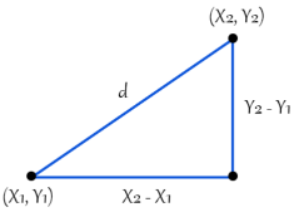

In machine learning, the coordinates are the features, and so the algorithm computes the differences between the features of the data points. To present our results graphically, the data points are restricted here to 2 features $x_1$ and $x_2$, and a label $y$. Of course, the algorithm can also be applied to data points having more than 2 features.

Here, only 2 simple examples are discussed, in each case reading a small data set as a Pandas dataframe, plotting the data points in a scatterplot, and then predicting the class of some new data points. Since this is a classification task, we need to use class `KNeighborsClassifier` from Scikit-Learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Unlike most other machine learning models, there is no training phase in KNN. We have to specify the value for K ourselves (i.e., it is a **hyperparameter**), and so the algorithm does not need to derive any parameters. Therefore, we call this **lazy learning** (in contrast to **eager learning** when there is a training of the model needed).

#### Example 1

We start with a dataset containing the height in cm and the weight in kg of 100 biological women and 100 biological men. On average, women are slightly smaller and lighter than men. Can we use this dataset to predict whether a person is a biological male or female based on their height and weight? Let's try that by applying KNN.

##### *Data exploration*

We read the csv file `"height_weight_sex.csv"`. Note that this file uses a comma as a separator, so we can just pass the name of the file to Pandas function `read_csv`:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.head()

Using the `head` method, we print out the first 5 records from our dataframe. As you already know, a dataframe is simply a table. The columns are the **features**, the rows are the data points or **examples**. In this case, the last column contains the **labels**. To know how many data points are in our dataset, we can just apply function `len` to our `DataFrame` object:

In [ ]:
len(df)  # length of dataframe = number of rows!

The first 5 examples contain data from females. We can see this by the label `'f'`. Males probably get the label `'m'`. Let's check that by calling method `unique` on column `df.sex`:

In [ ]:
df.sex.unique()  # method 'unique' returns unique values

Methode `info` gives an overview of the DataFrame we're dealing with:

In [ ]:
df.info()

By invoking method `describe` we can retrieve the statistics of the numeric features:

In [ ]:
df.describe()

To know the average height and weight of males and females separately, we can use method `groupby`, just like in SQL:

In [ ]:
df.groupby('sex').mean()  # method mean calculates the average

Indeed, we see that the females in the dataset are, on average, smaller and lighter than the males.

Let's visualize the data in a scatterplot, giving the data points a color based on the labels. We are going to color data points corresponding to men yellow, and data points corresponding to women green. In order to be able to reuse the code, we define a function:

In [ ]:
def scatter_plot(df):
    _, ax = plt.subplots()
    df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
    df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
    plt.grid()
    return ax

scatter_plot(df);

We see that there are indeed 2 distinct groups. Although there is some overlap between the two groups, they can be separated. So it is possible to predict from this dataset whether someone is female or male when we know their height and weight, and we can do that accurately, despite some possible mistakes because of the overlap.

The interface of the `KNeighborsClassifier` class is the same as that of other Scikit-Learn classes. For convenience, we are going to put the features and labels into NumPy arrays `X` and `y`, respectively. However, we still need to convert the labels to integers because the algorithm can only perform calculations using numbers. We do that by replacing label `'f'` by `1` and label `'m'` by `0`. This is called **feature encoding**.

In [ ]:
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

With NumPy and Pandas, we can perform operations on entire arrays without using loops! As we already know, these are called *vectorized* expressions.

##### *Model training*

Now we are ready to apply the KNN algorithm. First, we need to instantiate class `KNeighborsClassifier`. As we explained above, we need to specify K, as it is a **hyperparameter**. We do that by passing input parameter `n_neighbors`, which we set to 5:

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)  # K = 5
model.fit(X, y)

Recall that we do not have to train a model when we apply KNN. As we have to pass our data to the `KNeighborsClassifier` object, we still need to call method `fit`, which is usually invoked to train a model.

##### *Model evaluation*

We can also evaluate our model by calling method `score`. We are dealing with classification here, so we get the **accuracy** of the model. This is simply the number of correctly classified data points divided by the total number of points:

In [ ]:
model.score(X, y)  # calculates the accuracy

95.5% of the data points are correctly classified by the KNN algorithm! Because of the overlap between the female and male data points, the model does not perform 100% accurately.

In case of imbalanced datasets, the accuracy may give a wrong impression of the model's performance. Suppose you want to test if people are infected with COVID. If in reality only 0.1 % of the population is infected, then the following test has an accuracy of 99.9%, although it is useless!

```python
def is_infected(*symptoms):
    return False
```


A **confusion matrix** may give us a better idea of how well the model performs, as it gives an overview of:
- *True Positives* (TP): the number of samples labeled as 1 which have a predicted label of 1;
- *True Negatives* (TN): the number of samples labeled as 0 which have a predicted label of 0;
- *False Positives* (FP): the number of samples labeled as 0 which have a predicted label of 1;
- *False Negatives* (FN): the number of samples labeled as 1 which have a predicted label of 0.

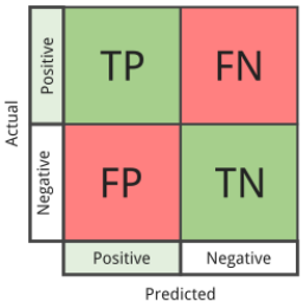

In case of our simple COVID test, we get the following confusion matrix:

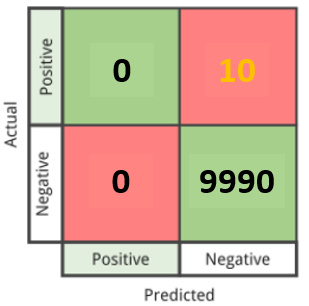

Now we clearly see our test is useless indeed as we cannot identify any of the infected persons! In other words, we have zero True Positives and too much False Negatives!

Using Scikit-Learn, we can easily plot a confusion matrix for our KNN model:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

That looks good! The dataset is balanced and the TP and TN are very high!

Using function `classification_report`, we are able to evaluate the model easily using other **evaluation metrics** such as precision and recall. To do use this function, we need both the actual labels `y` and the predicted labels `y_pred`, which are returned by method `predict`:

In [ ]:
y_pred = model.predict(X)

Now we can pass both `y` and `y_pred` to function `classification_report`:

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y, y_pred=y_pred))

Precision and recall are virtually the same because the number of false positives and the number of false negatives are almost the same, as is seen on the confusion matrix. This explains the high f1-score, which is the harmonic mean of both.

##### *Making predictions*

Method `predict` can also be used to predict the labels of new data. As an example, let's try to **predict** whether the following persons are biological males or females:
- person of 165 cm and 55 kg
- person of 185 cm and 70 kg
- person of 175 cm and 65 kg

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

The first 2 persons are pretty clear. However, the third person is questionable. To see why the model chooses "male", we create the scatterplot again, and now add the 3 new data points:

In [ ]:
scatter_plot(df)
plt.plot(X_new[:, 0], X_new[:, 1], 'ro');  # new points are red

Since we have taken K = 5, the KNN algorithm looks at the 5 points closest to a new point. The third person corresponds to the middle red point. Indeed, of the 5 closest points, 4 are yellow and only 1 is green, so the new point is also given a yellow color, which corresponds to label `'m'`.

##### *The optimal K value*

We've arbitrarily chosen to set K to 5. In general, assigning a higher value to K may lead to **underfitting**, whereas the lower the value assigned to K, the more likely the model will suffer from **overfitting**. So how do we get to know the optimal value for K? To answer this question, we will optimize its value by evaluating a range of K values using a validation set!

We use Scikit-Learn function `train_test_split` to divide the dataset in two subsets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.5, random_state=1)

print('training set:')
print(X_train.shape)
print(y_train.shape)

print('validation set:')
print(X_val.shape)
print(y_val.shape)

We define an array of K values ranging from 1 to 21. As KNN adopts the most frequent label of the nearest neighbors, it is helpful to choose K to be an odd number as this avoids tied votes in case of binary classification. Using a `for`-loop these values are evaluated on both the training and validation set. The resulting accuracies are stored in variables `acc_train` and `acc_val`:

In [ ]:
Ks = np.arange(start=1, stop=23, step=2)  # 23 is not included!

acc_train = np.zeros(len(Ks))
acc_val = np.zeros(len(Ks))
for i, K in enumerate(Ks):
    model = KNeighborsClassifier(K)
    model.fit(X_train, y_train)
    acc_train[i] = model.score(X_train, y_train)
    acc_val[i] = model.score(X_val, y_val)

Plotting the accuracies for both training and validation set as a function of the K value:

In [ ]:
plt.plot(Ks, acc_train, 'b.-',
         Ks, acc_val, 'r.-');
plt.grid();
plt.xlabel('K');
plt.ylabel('accuracy');
plt.legend(['training set', 'validation set']);

The optimal value for K is derived from the validation set accuracies. From the plot it is clear that K=5 is indeed the optimal value. Because of the random splitting of the dataset, results may differ, although it is seen that choosing a higher K value results in a less accurate model.

In [ ]:
K_opt = Ks[np.argmax(acc_val)]
print("optimal K:", K_opt)

#### Example 2

In a second example, we are going to predict whether or not a person who is on a social networking site will respond to an ad displayed on that site. In other words, we are going to predict whether a person will purchase the product or ignore the ad. To predict that, we use that person's age and estimated salary.

This is another example of *binary classification*, because we have 2 classes: persons who purchase the product, and persons who do not purchase the product. As it is a classification problem, we can again apply the KNN algorithm.

##### *Data exploration*

The dataset we are going to use is stored in file `"Social_Network_Ads.csv"`. Read that file and display the first 5 rows:

Get info about the dataframe:

Column `"User Id"` contains no information and column `"Gender"` is not going to be used. So the features are `"Age"` and `"EstimatedSalary"`, and the label is `"Purchased"`. Check that that last column is effectively made up of zeros and ones:

Now create a scatterplot and color the points corresponding to persons who purchased the product in green (`'g'`) and the points corresponding to persons who did not purchase the product in red (`'r'`):

##### *Model training*

Put the **features** in NumPy array `X` and the **labels** in NumPy array `y`:

Now apply the KNN algorithm using K = 5:

##### *Model evaluation*

What is the model's **accuracy**?

Plot the **confusion matrix**!

Print the corresponding **classification report**:

##### *Making predictions*

Now **predict** whether or not the following people will buy the product:
- person aged 25 with about 60 000 as salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary


Redraw the scatterplot and add the new data points in blue (`'b'`). Check if the calculated labels are correct. Recall we took the 5 closest points (K = 5)!

##### *The optimal K value*

Finally, optimize the K value.

### Logistic Regression

Although logistic regression can be seen as a regression technique for binary targets, as the name suggests, it is actually used for solving **binary classification** problems. It is also a linear model, so the `LogisticRegression` class is imported from Scikit-Learn's `linear_model` module:

In [ ]:
from sklearn.linear_model import LogisticRegression

To explain how the algorithm works, we make use again of the thermostat dataset that we introduced in the previous notebook about machine learning. Because this dataset is one-dimensional, the logistic regression algorithm will separate the two classes using a single *threshold* value for the temperature.

To illustrate how logistic regression works when a higher-dimensional dataset is involved, we will apply the algorithm to the two previous datasets consisting of two features and one target. In this way we will be able to visualize the **separating straight line** derived by the logistic regression algorithm on a 2D plot. This separating straight line is also called the *decision boundary*.

Note that Logistic regression may also be applied to solve n-dimensional problems in which case the algorithm finds a separating *hyperplane*.

#### Example 1

We re-create the thermostat dataset containing temperature values and corresponding labels indicating whether the heating is on or off:

In [ ]:
temperature = [17.1, 15.6, 23.1, 19.8, 12.9, 20.3, 14.7, 16.2]
heating = ['off', 'on', 'off', 'off', 'on', 'off', 'on', 'on']
table = pd.DataFrame(dict(temperature=temperature, heating=heating))
table

Let's plot the data:

In [ ]:
def plot_temperature_heating(table):
    '''
    plots heating vs temperature
    table: Pandas DataFrame with columns 'temperature' and 'heating'
    returns: axes
    '''
    _, ax = plt.subplots(1, 1, figsize=(8, 2))
    on = table.heating == 'on'
    off = ~on
    plt.plot(table[on].temperature, np.ones(on.sum()), 'go');
    plt.plot(table[off].temperature, np.zeros(off.sum()), 'ro');
    plt.xlabel('temperature');
    plt.ylabel('heating');
    plt.yticks((0, 1));
    ax.set_yticklabels(('off', 'on'))
    plt.grid();
    return ax

In [ ]:
plot_temperature_heating(table);

As we already know, training the model is done by passing feature `X` and labels `y` to the `fit` method:

In [ ]:
X, y = table[['temperature']].values, (table.heating=='on').values  # feature, labels
model = LogisticRegression(penalty=None)  # instantiate
model.fit(X, y)  # fit data

Using method `predict` it is possible to predict whether the heating is on or off for any new value:

In [ ]:
new_temperature = 17
model.predict([[new_temperature]]).item()  # predict label for new temperature value

Note that `new_temperature` is put between double square brackets because method `predict` only accepts 2D data structures as input, such as a Pandas DataFrame or a 2D array.

So the `LogisticRegression` class is instantiated, after which method `fit` is invoked to train the model. The `predict` method is called to get the label for the new temperature value. The accuracy is 100% for this model as the data points are perfectly separable:

In [ ]:
model.score(X, y)  # accuracy

Why does the logistic regression model predict that the heating is off when the temperature is 17°C? Let's check the threshold determined by the algorithm:

In [ ]:
threshold = -model.intercept_.item() / model.coef_.item()  # determine threshold
print(f'threshold is {threshold}°C')

The threshold is calculated using the model **parameters**, in this case an intercept and a coefficient.

The model applies a linear transformation to the input feature, in this case temperature $T$:

> $f = aT + b$

Parameters $a$ and $b$ are optimized by the algorithm by minimizing an error function or **loss function**, which quantifies the difference between true and predicted labels. This optimization is the actual **training** of the model.

Here, the transformation expresses the equation of a straight-line where parameter $a$ is the slope and parameter $b$ is the intercept. The threshold is found by evaluating $f=0$, which yields $-b/a$.

The transformed variable $f$ is finally converted to a number between 0 and 1 by applying the logistic or **sigmoid** function $\sigma$:

> $p = \sigma(f) = \frac{1}{1+\exp(-f)}$

Variable $p$ may be interpreted as the probability the label is equal to 1, or in this example, the probability that the heating is 'on'. The label is thus found by applying the `round` function to this probability value: if $p >= 0.5$, then the heating is 'on', otherwise it is 'off'.

Let's visualize the derived threshold (blue vertical line) and the corresponding sigmoid function (black dashed line), which shows us the probability that the heating is on for a given temperature:

In [ ]:
ax = plot_temperature_heating(table);
sigmoid = lambda f: 1 / (1 + np.exp(-f))
f = lambda x: model.coef_.item() * x + model.intercept_.item()
x = np.linspace(12, 24, 1000)
xl, yl = ax.get_xlim(), ax.get_ylim()
ax.plot(x, sigmoid(f(x)), 'k--');
ax.plot(threshold * np.ones(2), [-1, 2], 'b-');
ax.plot(new_temperature, 0, 'bo');  # new data point
ax.set_xlim(xl); ax.set_ylim(yl);

We see the logistic regression model separates both classes of data points perfectly indeed. The new datapoint (blue dot) lies to the right of the blue line as its temperature value of 17°C is greater than the threshold value of 16.682°C. That is why the model predicts the heating is off in that case.

#### Example 2

Let's look again at the dataset containing the height in cm and the weight in kg of 100 biological women and 100 biological men. We assign the **features** to NumPy array `X` and the **labels** to NumPy vector `y` after converting them to integers:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
X = df[['height', 'weight']].values  # put features height and weight into matrix X
y = (df.sex=="f").values.astype(int)  # convert column df.sex containing the labels to boolean vector y

As we already know, the interface of class `LogisticRegression` is the same as for the other Scikit-Learn classes we've already discussed:

In [ ]:
model = LogisticRegression(penalty=None)
model.fit(X, y)

Note that we set `penalty` to `None` as we don't want any regularization, which are techniques to overcome overfitting, and will be discussed later.

The model's **accuracy** is 96%, which is slightly better than that of the KNN model:

In [ ]:
model.score(X, y)

The **confusion matrix**:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('m', 'f'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

The **predictions** for the three new persons that do not belong to the trainingset:

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

In fact, the logistic regression model predicts the **probability** that a sample belongs to class `1`:

In [ ]:
p = model.predict_proba(X_new)  # returns the probabilities
np.round(p, 2)  # round to two decimals

The first and second column is the probability that the sample has label `0` and `1`, respectively. The total probability, which is the sum of the rows, is equal to 1, because there is a 100% probability that a sample belongs to either class `0` or `1`. To predict the label of a sample, we simply select the column having the largest probability. And that is exactly what method `predict` does!

It's interesting to see that the logistic regression model predicts the third person to be female, while the KNN model predicted this person to be male, although the probabilities are very close to 50%, which implies the model is not very sure. To see why, let's create the scatterplot again, add the 3 new data points, and plot the separating straight line derived by the logistic regression model.

First we need the **parameters**. In this case, there are two coefficients or **weights** $w_1$ and $w_2$, and an intercept $b$, also called **bias**:

In [ ]:
w, b = model.coef_[0].flatten(), model.intercept_.item()  # weights w and bias b
w, b

Why are there two weights here? Well, because there are two features: height and weight. Once we have the weights and the bias, it is possible to add the separating line to the scatter plot. Recall that the features are linearly transformed:

> $f = w_1X_1+w_2X_2+b$

where $X_1$ and $X_2$ are the two features. The separating straight-line is found easily by evaluating $f=0$, which gives:

> $X_2 = -\dfrac{w_1X_1+b}{w_2}$

Note that in this case $X_2$ is plotted as a function of $X_1$, so the x-axis corresponds to $X_1$ and the y-axis to $X_2$.

In [ ]:
_, ax = plt.subplots()
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax);  # men: yellow
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax);  # women: green
plt.plot(X_new[:, 0], X_new[:, 1], 'ro')  # new points are red

# adding the separating straight line in red
xline = np.linspace(150, 200, 2)
yline = -(xline * w[0] + b) / w[1]
plt.plot(xline, yline, 'r-');

plt.ylim((50, 90))
plt.grid()

As we see, the third person, which is represented by the middle red dot, is very close to the separating line, but it is on the "female" side indeed!

#### Example 3

Finally, let's try out logistic regression on the social media dataset `"Social_Network_Ads.csv"`. We read the csv-file and assign the **features** to NumPy array `X` and the **labels** to NumPy vector `y`:

And we apply logistic regression (without penalty):

We calculate the model's **accuracy** and plot the **confusion matrix**:

That's not looking good at all! The model always predicts 0, which explains its low accuracy.

Probably the problem is caused by the second feature, the estimated salary, which has very high values. To fix this issue, we divide the values of this feature by 1000:

[**Feature scaling**](https://en.wikipedia.org/wiki/Feature_scaling) or **normalization** is a very common and important technique because many machine learning algorithms perform much better on small values, especially neural nets!

Let's apply the logistic regression algorithm again and calculate the accuracy of the resulting model:

The accuracy is much better now, and comparable to the accuracy of the KNN model. Checking the confusion matrix:

Let's **predict** the purchase behavior of the three new persons:

- person aged 25 with about 60 000 as salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary


We get the same result as the KNN model.

Finally, let's visualizing the result by adding the separating line and the new data points to the scatter plot:

### Decision trees

Decision trees are very popular machine learning and data mining methods with a high **interpretability**, also called **explainability**. Unlike many other machine learning models, decision tree models are no "black boxes" indeed, as they can be explained in a way that "makes sense" to a human being at an acceptable level. Moreover, they can be used as graphical tools that may facilitate decision-making.

Decision trees can be used to solve classification and regression problems, and they can also be applied for unsupervised learning. Here, we will only discuss **classification** problems, and the resulting decision tree is therefore called a *classification tree*.

Using Scikit-Learn, we have to import the `DecisionTreeClassifier` class. We also import function `plot_tree` to plot the decision trees we've trained, and we need the `OrdinalEncoder` class to convert the categorical values into integers:

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OrdinalEncoder

A decision tree is sometimes also referred to as a *feature tree*, because the internal nodes are labeled with a feature. Each node is split based on the different values the feature can take on in that node, whereas each leaf of the tree represents a prediction. This may sound quite abstract, so let's discuss the famous decision tree to predict whether someone will play tennis or not depending on the weather conditions.

#### Example

A very famous example is the "play tennis" decision tree. The corresponding dataset is stored in file `'play.txt'`, which can be read using Pandas function `read_csv`. Here, the separator is a space:

In [ ]:
df = pd.read_csv('play.txt', sep=' ').iloc[:, :-1]  # last column is empty, so we don't need it...
df

We don't need the `"Day"` attribute as it doesn't contain any useful information; it's just an id. The **features** are attributes `"Outlook"`, `"Temperature"`, `"Humidity"`, and `"Wind"`. The **labels** are in column `"Play"`:

In [ ]:
features = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
labels = df['Play']

Just like most other machine learning algorithm, the decision tree algorithm implemented in Scikit-Learn is not capable of dealing with string values. So we will **encode** the feature values, which means that we will transform the strings into integer values. We do that by applying the `OrdinalEncoder` class:

In [ ]:
feature_encoder = OrdinalEncoder()
feature_encoder.fit(features)
X = feature_encoder.transform(features)
print(X)

We see that each string is converted to an integer indeed. To know which integer corresponds to which string, we can use the following function:

In [ ]:
def get_feature_value(encoder, feature, id):
    icol = np.where(encoder.feature_names_in_ == feature)[0][0]
    return encoder.categories_[icol][id]

For instance, what does id `2` stands for in the second column, corresponding to the `"Temperature"`?

In [ ]:
get_feature_value(feature_encoder, "Temperature", 2)

We can do the same for the labels, in which case we'll get zeros and ones. Alternatively, we can use the `LabelEncoder`, which is designed specifically for encoding a binary categorical target:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(labels)
y = label_encoder.transform(labels)

print("0 is", label_encoder.classes_[0])
print("1 is", label_encoder.classes_[1])

Now we are ready to **train** a decision tree model. As usual, we instantiate the `DecisionTreeClassifier` and we invoke the `fit` method. We also calculate the accuracy by calling method `score`:

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

An score of 100% is perfect! Let's plot the resulting decision tree using function `plot_tree`:

In [ ]:
plot_tree(model,
          feature_names=feature_encoder.feature_names_in_,
          class_names=label_encoder.classes_,
          impurity=False, filled=True, fontsize=8, rounded=True);

The four leaves at the deepest level only have 1 sample. That explains why we get an accuracy of 100%: the tree has "memorized" the samples. This is an example of **overfitting**: the model is too specific! To overcome this, we could prune the decision tree or optimize the hyperparameters determining its size using a validation set.

Here, the dataset is too small, so we only change the hyperparameter that determines the maximum depth of the tree and manually set it to 2:

In [ ]:
model = DecisionTreeClassifier(max_depth=2)  # limit the depth of the tree by setting max_depth to 2
model.fit(X, y)
model.score(X, y)

Now we have 85.7% **accuracy**. Let's plot the **confusion matrix**:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X, y,
                                      display_labels=('No', 'Yes'),  # labels for 0 and 1
                                      colorbar=False);  # no colorbar

Two samples are being misclassified by this model. Let's visualize the resulting decision tree:

In [ ]:
out = plot_tree(model,
                feature_names=feature_encoder.feature_names_in_,
                class_names=label_encoder.classes_,
                impurity=False, filled=True, fontsize=8, rounded=True);

# convert the integers back to strings - this for loop only works for this tree!
for i in [0, 2]:
    out[i].set_text(out[i].get_text().replace("<= 0.5", feature_encoder.categories_[i][0]))

How do we have to apply this decision tree?
- We start with the root node. Is feature "Outlook" equal to "Overcast"?
  - If yes, then we go to the child node on the left, which is a leaf. 4 samples have value "Overcast" and in this case we predict "Yes", which means we will play tennis.
  - If no, then we go to the child node on the right. Here we have to check feature "Humidity". Is it "High"?
    - If yes, then we go to the left and we predict "No", which means we won't play tennis.
    - If no, then we go to the right and we predict "Yes".

What does "samples" and "value" mean? The first indicates how many samples are left in the node. In the root node, for instance, there are 14 samples, which is the complete dataset. In the child node on the right (in white color), there are 10 samples left, as the other child node on the left deals with the 4 "Overcast" samples. The first element of the "value" attribute indicates how many of the samples have label `0` (or "No"), while the second element indicates how many samples have label `1` (or "Yes"). The "class" corresponds to the highest number of labels. In the root node, for instance, there are 5 samples with label `0` and the other 9 samples have label `1`. So the class representing the majority of the labels is "Yes". If a node is a leaf, then this class is the predicted value in that node.

Suppose now we want to predict whether or not it is a good idea to play tennis when the outlook is overcast, the temperature is cool, and when there is high humidity and strong wind, then we have to create a new Pandas dataframe containing this new data point:

In [ ]:
new = pd.DataFrame(dict(Outlook=['Overcast'],
                        Temperature=['Cool'],
                        Humidity=['High'],
                        Wind=['Strong'],
                        Play=['????']))
new

Of course, we have to encode this new sample by applying the `feature_encoder` we defined earlier for the trainingdata:

In [ ]:
Xnew = feature_encoder.transform(new[['Outlook', 'Temperature', 'Humidity', 'Wind']])

Now we can make a **prediction** for this new data point:

In [ ]:
model.predict(Xnew).item()

It returns `1`, which corresponds to "Yes":

In [ ]:
get_feature_value(label_encoder, "Play", 1)

A final remark about the resulting decision tree. The Scikit-Learn algorithm is capable of deriving *binary* trees only, which means the maximum number of child nodes is two. If there would be more than two child nodes allowed, then in this example it would be better to split the root node into three branches, which would result in the following tree of depth 2:

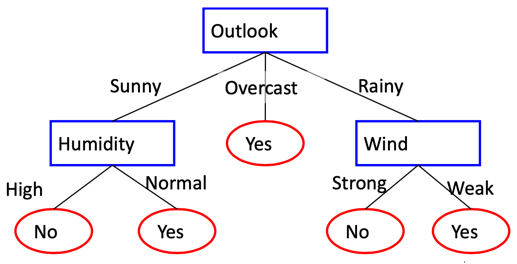

## **Regression**

Regression is also a type of **supervised learning**, but in this case, it is used to **predict quantitative variables**, such as house prices. We discuss both linear and polynomial regression. We also explain the difference between underfitting and overfitting, and show techniques to find the best fit.

### Linear Regression

Linear regression is a form of **supervised learning** in which the **target**, i.e., the feature we predict, is a quantitative variable. Moreover, we assume that there is a linear relationship between the other features we use to predict the target.

The simplest form of linear regression is that in which we try to predict a target $y$ using 1 feature $x$. We call this **simple linear regression**. In this case, we can represent the data points in a two-dimensional coordinate system. Applying linear regression then comes down to finding the **best fitting line**.

We know that the general equation of a straight line is:

> $y=ax+b$

To find the best fitting line, we apply an algorithm that derives *slope* $a$ and *intercept* $b$ from the data points $(x_i, y_i)$, where $i$ refers to the index of the data points.

Parameters $a$ and $b$ are derived by minimizing the squared differences between true values $y$ and predicted values $\hat{y}$:

> $L = \sum_{i=1}^n (y_i - \hat{y}_i)^2$

with $n$ the number of samples. $L$ is called the **loss function**. This minimization of the loss function is the actual **training** of the model.

It is common to normalize the loss score by dividing it by the number of samples $n$, in which case it is called the **mean squared error** (MSE). Note that the difference between true and predicted value is called the error or **residual**.

Once the values for **parameters** $a$ and $b$ are found, we have the linear regression **model**, which we can apply to make predictions. We do this by inserting a new value $x$ into the found equation to obtain the prediction $\hat{y}$.

**Prediction** $\hat{y}$ will obviously not equal the true value $y$, but we do know that the average difference between predicted and true value is minimal, because the algorithm derived optimal values for $a$ and $b$ by minimizing the errors of all data points in the data set.

There are several **algorithms** to apply linear regression. And we can also use more than 1 feature $x$ to predict $y$. For example, if we have 2 features $x_1$ and $x_2$, we look for the best fitting plane in a three-dimensional coordinate system. For more than 2 features, we look for a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) in n-dimensional space. We can also model nonlinear relationships with *polynomial regression*, as will be shown in the next section.

In this notebook, we only discuss 2 examples in which we apply simple linear regression. In each example, we first read a dataset as Pandas dataframe, and we visualize the data points in a scatterplot using Matplotlib. Then we use class `LinearRegression` from Scikit-Learn to find the line of best fit and make some predictions with the derived model.

In [ ]:
from sklearn.linear_model import LinearRegression

#### Example 1

In the first example, we examine the age of couples. Specifically, we try to predict the wife's age from the husband's age. Intuitively, we could say that, on average, the age of the partners will be the same. How do we express this mathematically?

Since we want to predict the wife's age, this is the target $y$. The husband's age is then feature $x$. Our intuitive model then simply has the following equation:

> $y = x$

Thus, slope $a$ is 1, and intercept $b$ is 0.

Now suppose we were to assume that the wife is on average 1 year younger than the husband, then we get the following model:

> $y = x - 1$

In this case, the parameters $a$ and $b$ are equal to 1 and -1, respectively.

Thus, we can keep guessing the best values for parameters $a$ and $b$. But that is not how we proceed in machine learning. In machine learning we are going to collect data and then run an algorithm on that data to find the best values for our parameters. Let's do that!

We have already collected the data and the dataset is stored in the file `"age_couple.xlsx"`. This is an Excel file, but fortunately, Pandas provides a function `read_excel` that allows us to easily load a table from an Excel file as a `DataFrame`:

In [ ]:
df = pd.read_excel('age_couple.xlsx')
df.head()

Using the `head` method, we print out the first 5 records from our dataframe. Let's check the total number of samples in the dataset:

In [ ]:
len(df)  # length of dataframe = number of rows!

It is seen that we have 25 examples and 3 features. However, column `"Couple"` is just an index from which we cannot get any useful information. So we can ignore that column. The other two columns are the ages of husband and wife. We need those **features**! Let's plot those ages against each other in a scatterplot. We want to predict the wife's age, so this is the **target** and it will be on the y-axis. The x-axis then respresents the age of the husband:

In [ ]:
husband, wife = tuple(df.columns[1:])  # assign column names to variables
df.plot.scatter(x=husband, y=wife)  # make scatter plot using method plot.scatter
y = x = np.linspace(0, 100, 100)
plt.plot(x, y, 'k--')  # diagonal y = x
plt.grid()  # add grid

We also plotted our intuitive model $y=x$ and we see that this is not a bad guess! Wondering which model the machine learning algorithm will derive.... For clarity, we first put feature and target into separate variables, and we convert them to NumPy arrays:

In [ ]:
X = df[husband].values.reshape(-1, 1)  # feature X - must be 2D!
y = df[wife].values  # target y

To apply linear regression, we need to instantiate the `LinearRegression` class. Then we `train` the model by calling the `fit` method with variables `X` and `y` as inputs. It is this method that will derive the parameters $a$ and $b$ by **fitting** the data points:

In [ ]:
model = LinearRegression()  # instantiate LinearRegression object
model.fit(X, y)  # training the model = fitting the data points

We can now check how well the algorithm has fit the data points by calling method `score`:

In [ ]:
model.score(X, y)  # calculates the R² score

In case of linear regression, this score is the **coefficient of determination R²**. Discussing how to calculate this score is out of scope. Just know that R² is a number between 0 and 1, and the closer the score is to 1, the better the model is. It is also useful to calculate the mean absolute error (**MAE**), the mean squared error (**MSE**), and the root mean squared error (**RMSE**). To do so, we first have to calculate the predicted values using method `predict`:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# first get predictions...
yp = model.predict(X)

# ...so we can calculate the scores
print('MAE is', mean_absolute_error(y_true=y, y_pred=yp))
print('MSE is', mean_squared_error(y_true=y, y_pred=yp))
print('RMSE is', mean_squared_error(y_true=y, y_pred=yp, squared=False))  # set squared to False to get RMSE

These scores don't tell us much, so it's easier to understand the R² score, which is very close to 1 here, indicating a good fit!



We can also query our **parameters** $a$ and $b$:

In [ ]:
a, b = model.coef_[0], model.intercept_  # slope m and intercept b
print(f'slope a is {a:.3f}, intercept b is {b:.3f}')

We see that the algorithm derived different values for $a$ and $b$. Let's plot the result:

In [ ]:
X_line = np.linspace(0, 100, 100)  # create 100 equally spaced points between 0 and 100
y_line = a * X_line + b  # line of best fit derived by the regression model
df.plot.scatter(x=husband, y=wife)
plt.plot(X_line, X_line, 'k--', X_line, y_line, 'r-')
plt.legend(['data', 'intuitive', 'ML model'])
plt.grid()

So the machine learning model will estimate the wife's age to be slightly lower than her husband's. Let's check that with some new data points. Suppose we have 2 new couples whose husbands are 40 and 80 years old, respectively. Using method `predict` we can now easily predict the age of their wife:

In [ ]:
X_new = np.array([[40],   # husband of age 40
                  [80]])  # husband of age 80
np.round(model.predict(X_new))

The model predicts that the wifes' respective ages (rounded) will be 38 and 76. Are those predictions ok? Well, it is a very small dataset, and so those predictions are not reliable. In practice, it is best to make sure we have a much larger dataset so that we can split it into a training, validation, and testing set. That way we can avoid overfitting and thoroughly evaluate our model. We'll discuss that in the next section.

#### Example 2

The second dataset is one from Sweden. It contains for different regions from that country the number of claims submitted to insurance companies, and the total amount they paid out (in 1000 Swedish kronor). Obviously, it is very useful for those insurance companies to be able to predict that amount if they know the new number of claims. An ideal case for applying simple linear regression!

Read in the file `"auto_insurance_sweden.csv"`. This is a csv-file that you can easily read in Pandas with the function `read_csv`. Beware! The file did not use a comma but a semicolon as a separator, so you have to pass an additional input parameter `sep=";"` to the function, in addition to the file name. Assign the `DataFrame` object returned by the function to variable `df`, and print the first 5 lines using method `head`:

How many data points does the dataset contain?

We assign the column names to variables:

Making a scatterplot of the data:

Convert **feature** and **target** to NumPy arrays, and put them into variables `X` and `y`, respectively:

Applying simple linear regression:

Calculating the **R² score**:

Assigning the **parameters** to variables `a` and `b`:

Creating again the scatterplot and adding the derived regression line:

What will be the total amount the insurance companies will have to pay out if there are 80, 100 and 140 claims?

### Polynomial Regression

Suppose the relation between the independent variable $x$ and the dependent variable $y$ is not linear. In that case, we may apply **polynomial regression**, which results in a curve that is not a straight line, as the relation between $x$ and $y$ is expressed by the following polynomial function:

> $y = b + a_1x + a_2x^2 + ... + a_nx^n = b + \sum_{j=1}^{n}a_jx^j$

where parameters $a_j$ and $b$, also called the **coefficients**, are derived again by minimizing an error function. The highest power $n$ is the **degree** of the polynomial. Note that $n$ equals 1 in case of simple linear regression.

#### Example

As an example, consider the data stored in `wage_vs_hapiness.json`:

In [ ]:
happy = pd.read_json('wage_vs_happiness.json', orient='table');
happy.head()

Getting info about the resulting DataFrame:

In [ ]:
happy.info()

Calculating some summarizing statistics:

In [ ]:
happy.describe().T

The wage is expressed in 10K euros and the happiness is expressed as a score between 1 and 10.

Let's plot the data:

In [ ]:
happy.plot.scatter('wage', 'happiness');
plt.grid();

Let's try simple linear regression:

In [ ]:
X, y = happy[['wage']].values, happy['happiness'].values  # feature, target

linreg = LinearRegression()
linreg.fit(X, y)
linreg.score(X, y)  # R²

And plot the result:

In [ ]:
happy.plot.scatter('wage', 'happiness');
plt.grid();
Xline = np.array([[0], [20]])
plt.plot(Xline, linreg.predict(Xline), 'r-');

This is clearly a non-linear relation as the increase in happiness is less when the wage is high.

We may use the Scikit-Learn's `PolynomialFeatures` class to preprocess feature `X`, but using NumPy function `polyfit()` is more straightforward. Let's try a polynomial of degree 15:

In [ ]:
X = X.flatten()               # polyfit wants 1D array!
a = np.polyfit(X, y, deg=15)  # polynomial fit of degree 15

Using function `polyval()` the predictions can be calculated:

In [ ]:
from sklearn.metrics import r2_score  # import function to calculate R² score

yp = np.polyval(a, X)          # predictions
r2_score(y_true=y, y_pred=yp)  # R² score

Now we get a R² score of 0.87, which indicates the polynomial fit is significantly better than the linear regression! Let's plot the corresponding regression curve:

In [ ]:
happy.plot.scatter('wage', 'happiness');
plt.grid();
yl = plt.ylim()
Xcurve = np.linspace(0, 20, 100)
plt.plot(Xcurve, np.polyval(a, Xcurve), 'r-');
plt.ylim(yl);

Indeed, the polynomial fit captures the irregularities in the dataset better than the linear regression model. However, These irregularities can largely be attributed to **noise** in the data, and we do not want the model to take them into account!

#### Underfitting and Overfitting

It's clear the linear regression model resulting in a straight line is too simple to express the relation between wage and happiness. Actually, it is an example of **underfitting**. However, the polynomial model of degree 15 is too specific, and probably, it will not perform well on new data. This is called **overfitting**.

So how can we find the right model that does not suffer from underfitting nor overfitting? How do we obtain a good balance between **optimization**, which fits the data as best as possible during training, and **generalization**, which assures a good model performance on new data during inference?

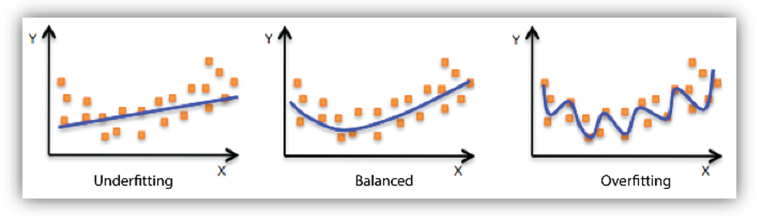

One best practice in machine learning is to reserve a part of the dataset for **validation** only. That implies a given dataset is split into a training set and a validation set, where the first is used to derive the optimal parameter values, and the latter to evaluate the trained model. In case of overfitting, the model will perform very well on the training data yet poorly on the validation data that are not being used to optimize the parameters.

Let's bring that into practice. First we import Scikit-Learn function `train_test_split()`:

In [ ]:
from sklearn.model_selection import train_test_split

Now we split the dataset into a training and validation set:

In [ ]:
X, y = happy[['wage']].values, happy['happiness'].values  # feature, target

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.5,   # 50% is used for validation
                                                  random_state=0)  # set random seed

So 50% of the data are used to for training and the remaining 50% for validation. The selection of samples happens randomly. For didactic purposes, we've set the random seed; in practice, it is not recommended to do so. Also notice the use of the term *test* instead of *validate*. The difference between validation and testing will be addressed below.

Let's plot the data points used for training (blue) and validation (red) to see if they are randomly selected indeed:

In [ ]:
plt.plot(X_train.flatten(), y_train, 'b.', label='training set');
plt.plot(X_val.flatten(), y_val, 'r.', label='validation set');
plt.legend();
plt.xlabel('wage');
plt.ylabel('happiness');
plt.grid();

Looks fine! Let's now illustrate how training and validation data are used by applying simple linear regression first, which we've already discussed above:

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"training: {linreg.score(X_train, y_train)}")
print(f"validation: {linreg.score(X_val, y_val)}")

So the *fitting is performed on the training data only*, after which the resulting model is evaluated using both the training and validation data! It is seen the model still performs well: R² score is 0.79 and 0.80, respectively, for the training and the validation set.

How about fitting the data using a polynomial of degree 15, like we did before?

In [ ]:
a = np.polyfit(X_train.flatten(), y_train, deg=15)  # polynomial fit of degree 15
print(f"training: {r2_score(y_true=y_train, y_pred=np.polyval(a, X_train.flatten()))}")
print(f"validation: {r2_score(y_true=y_val, y_pred=np.polyval(a, X_val.flatten()))}")

The model has a score of 0.88 on the training set, but a lower score of 0.86 on the validation set, which may indicate there is overfitting indeed.

To find the optimal degree of the polynomial fit, we can loop over a range of degrees, say from 1 to 20, while evaluating each model on both the training and validation set. The evaluation **metric** we will use here is the **mean absolute error** (MAE), which is defined in a very similar way as the MSE, except it considers the absolute value of the residuals instead of the square:

> $MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$

The MAE has the advantage that it is has the same unit as the target.

In [ ]:
from sklearn.metrics import mean_absolute_error as MAE  # import MAE function

mae_train = []  # list of MAEs of training data
mae_val = []    # list of MAEs of validation data
coef = []       # list of coefficients
degrees = range(1, 21)  # range of degrees of polynomial function

for degree in degrees:  # loop through degrees

    a = np.polyfit(X_train.flatten(), y_train, degree)  # polynomial fit of training data
    yp_train = np.polyval(a, X_train.flatten())         # predictions of training data
    yp_val = np.polyval(a, X_val.flatten())             # predictions of validation data

    coef.append(a)  # coefficients
    mae_train.append(MAE(y_true=y_train, y_pred=yp_train))  # MAE of training data
    mae_val.append(MAE(y_true=y_val, y_pred=yp_val))        # MAE of validation data

Let's plot the result using a Matplotlib animation:

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# initialization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # figure containing 2 axes
ax1.plot(X_train.flatten(), y_train, 'b.', label='training set');
ax1.plot(X_val.flatten(), y_val, 'r.', label='validation set');
ax1.legend();
xl, yl = ax1.get_xlim(), ax1.get_ylim()
Xcurve = np.linspace(0, 20, 1000)
regression_line = ax1.plot(Xcurve, np.polyval(coef[0], Xcurve),'k-')
ax1.set_title('degree = 1');
ax1.set_xlabel('wage');
ax1.set_ylabel('happiness');
ax1.set_xlim(xl);
ax1.set_ylim(yl);
ax1.grid();
ax2.yaxis.set_label_position("right");
ax2.yaxis.tick_right();
mae_train_line = ax2.plot(degrees[0], mae_train[0], 'b.-', label='training');
mae_val_line = ax2.plot(degrees[0], mae_val[0], 'r.-', label='validation');
ax2.legend();
ax2.set_xlabel('Degree');
ax2.set_ylabel('MAE');
ax2.set_xlim((0, 21));
ax2.set_ylim((0.74, 0.99));
ax2.grid();

# update function for animation
def update(degree):
    yplot = np.polyval(coef[degree-1], xplot)
    regression_line[0].set_ydata(yplot)
    ax1.set_title('degree = ' + str(degree));
    mae_train_line[0].set_xdata(degrees[:degree])
    mae_train_line[0].set_ydata(mae_train[:degree])
    mae_val_line[0].set_xdata(degrees[:degree])
    mae_val_line[0].set_ydata(mae_val[:degree])

# create animation
ani = FuncAnimation(fig, update, frames=degrees, blit=False, repeat=True)
plt.close()
ani

The left plot displays the dataset along with the resulting regression curve, while the right plot illustrates the Mean Absolute Error (MAE) for both training and validation as a function of the polynomial degree. This right plot is commonly referred to as the **model complexity graph**. It quantifies the error in relation to the model's complexity, which primarily depends on the number of parameters. In other words, the more parameters, the more complex the model becomes. Here, the number of model parameters corresponds to the polynomial degree plus one. The degree itself is considered a **hyperparameter**, as it is set by the user rather than derived by the machine learning algorithm.

Let's plot the final version of the model complexity graph displaying all degrees:

In [ ]:
plt.plot(degrees, mae_train, 'b.-', label='training');
plt.plot(degrees, mae_val, 'r.-', label='validation');
plt.legend();
plt.xlabel('Degree');
plt.ylabel('MAE');
plt.grid();

Upon closer examination of the model complexity graph, we observe that the blue curve (representing training MAE) consistently decreases with increasing degree. However, the red curve (indicating validation MAE) initially decreases but starts rising again beyond degree 5. This behavior suggests that overfitting occurs for degrees higher than 5, implying that the optimal degree for this model is 5! So we finally fit the complete dataset using a polynomial fit of degree 5 and evaluate this final model:

In [ ]:
a = np.polyfit(X.flatten(), y, deg=5)
yp = np.polyval(a, X.flatten())
MAE(y_true=y, y_pred=yp)

We achieve a mean difference of 0.77 between the true and predicted happiness score when estimating one's happiness based on the wage. Let's plot the resulting regression curve:

In [ ]:
happy.plot.scatter(x='wage', y='happiness');
Xcurve = np.linspace(0, 20, 100)
plt.plot(Xcurve, np.polyval(a, Xcurve), 'r-');
plt.grid();

The red polynomial function of degree 5 is a better fit than the best fitting straight line obtained from linear regression. On the other hand, it appears to be less affected by irregularities in the data than a high-degree polynomial fit is affected. In conclusion, it captures well the general relationship between one's wage and happiness!

It is common practice to create a third dataset, the **test set**, which is used to evaluate the final model. While some hyperparameters are fine-tuned using the validation set, information may still leak from this set into the model. The test set remains free from any such information leaks, providing an excellent means to evaluate the model's performance on completely new data. Only when this final evaluation using the test set yields positive results can the model be confidently deployed.

#### Regularization

Instead of looping over a range of degrees, we may apply a mathematical trick called regularization. In general, **regularization in machine learning** is a set of techniques used to reduce overfitting by penalizing model coefficients. It is beyond the scope of this workshop to delve into the mathematical details.

However, as an example, **LASSO regression** is applied here that yields a regression curve which is very similar to the polynomial curve of degree 5 derived in previous section. Although we have defined a polynomial of degree 10, the regularization reduced the model's complexity by setting some of the coefficients to zero or values close to zero. The resulting MAE equal to 0.78 is very close to the score of the polynomial fit of degree 5.

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

lasso = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    Lasso(alpha=0.01, tol=0.001)
)

lasso.fit(X, y);

MAE(y_true=y, y_pred=lasso.predict(X))

Let's plot the resulting regression curve that has been regularized:

In [ ]:
happy.plot.scatter(x='wage', y='happiness');
xplot = np.linspace(0, 20, 100).reshape(-1, 1)
plt.plot(xplot, lasso.predict(xplot), 'r-');
plt.grid();

## **Clustering**

Clustering is a technique in **unsupervised learning** to partition a set of data points into groups or clusters based on their inherent **similarities**. The aim is to group together data points that are more similar to each other while being dissimilar to data points in other clusters. Unlike supervised learning, where the algorithm learns from labeled data, clustering algorithms operate on **unlabeled data**, making them particularly useful for exploring patterns and structures within datasets where the class labels are unknown or unavailable.

### K-Means Clustering

In the previous examples on classification, datasets were labeled. Specifically, there was a column in the dataframe that indicated to which class a data point belonged. However, labeling datasets is time-consuming, so it would be useful if we could leave that to an algorithm. And those algorithms exist! We call them clustering algorithms as they divide the data into **clusters** by themselves! So they are often applied for *preprocessing* the data.

In this notebook, we demonstrate one of the best-known clustering algorithms: K-Means clustering. The idea behind this algorithm is as follows. The algorithm randomly chooses K points, which we call **centroids**, because it is going to place each of those points at the center of one of the K clusters. How does the algorithm do that? First, it calculates the distance of all the points to the centroids, and it assigns each point to the cluster with the centroid it is closest to. Then it moves each centroid to the center of its own cluster. It then recalculates the distances between all the data points and the new centroids, reassigns the data points to the clusters, and recalculates the position of the centroids. The algorithm keeps repeating this until the centroids stop moving and the data points are in their final cluster.

As an example, we apply K-Means clustering to the datasets from the section on K Nearest Neighbors. We use the class `KMeans` from Scikit-Learn for this purpose:

In [ ]:
from sklearn.cluster import KMeans

So this time we are not going to use the column containing the labels, but let the algorithm divide the data into groups in an "**unsupervised**" way. We only have to specify the number of clusters K. So, as with KNN, this is a **hyperparameter**. We can also choose the distance measure. As usual, we apply the **Euclidean distance**.

#### Example 1

We again read the dataset `"height_weight_sex.csv"` and plot the data points in a scatterplot. Since we will not use the labels in column `"sex"`, we give all the points the same color:

In [ ]:
df = pd.read_csv("height_weight_sex.csv")
df.plot.scatter(x='height', y='weight')
plt.grid()

We only need the **features** `"height"` and `"weight"`. We convert these again to a NumPy array `X`:

In [ ]:
X = df[['height', 'weight']].values

To apply the K-means algorithm, we need to instantiate class `KMeans`. We have to specify the number of clusters K by passing input parameter `n_clusters`. We know that there are 2 classes, so we specify 2 as the input argument. The algorithm randomly determines the initial position of the 2 centroids, and so it uses a random number generator. By setting input parameter `random_state` we can specify the seed of that generator (although we are not allowed to do that when solving real-world problems!):

In [ ]:
model = KMeans(n_clusters=2, random_state=20)  # K = 2
model.fit(X)  # only pass X!

Remarkably, we only need to pass array `X` with features to method `fit`, and no array `y` with labels, because it is an **unsupervised learning** algorithm!

Now if we want to know the labels, we can pass `X` to method `predict`:

In [ ]:
yp = model.predict(X)  # predicted labels

Attention! The algorithm may have given the classes a different id, because it does not know the ids used in the dataset! To check that, we extract the labels from the dataset, assign them to variable `y`, and calculate the accuracy:

In [ ]:
y = (df.sex=="f").values.astype(int)  # de real labels
(y == yp).sum() / len(y)  # accuracy = number of correct predictions divided by total number of data points

96% of the labels are predicted correctly. Had we gotten 4% as the result, we had to flip the labels as follows:

```python
b = yp == 1
yp[b] = 0
yp[~b] = 1
```

Now let's predict again whether the 3 new individuals with known height and weight are male or female:

In [ ]:
X_new = np.array([[165, 55],   # person of 165cm and 55kg
                  [185, 70],   # person of 185cm and 70kg
                  [175, 65]])  # person of 175cm and 65kg
model.predict(X_new)

The third person now belongs to the cluster with women! To see why, we again create a scatterplot showing the 3 new data points. To do that effeciently, we add the predicted labels to the data frame:

In [ ]:
df['prediction'] = np.array(['m', 'f'])[yp]  # 'm' is 0 and 'f' is 1
df.head()

We now make 2 scatterplots: in the left plot the data points are colored according to the true labels, and in the right plot according to the clusters:

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True)
df.loc[df.sex=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax1)
df.loc[df.sex=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax1)
ax1.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax1.set_title("true labels")
ax1.grid()
df.loc[df.prediction=='f', :].plot.scatter(x='height', y='weight', c='g', ax=ax2)
df.loc[df.prediction=='m', :].plot.scatter(x='height', y='weight', c='y', ax=ax2)
ax2.plot(X_new[:, 0], X_new[:, 1], 'ro')
ax2.set_title("cluster labels")
ax2.grid()

The third person is represented by the middle red point. On the right plot, we see that the 2 clusters do not overlap, and that this point is still inside the cluster with green points indeed!

#### Example 2

Now try K-means clustering yourself on the dataset `"Social_Network_Ads.csv"`. Read the file and create a scatterplot without considering the labels:

Put the columns with **features** `"Age"` and `"EstimatedSalary"` into NumPy array `X`:

Apply K-means with K = 2:

Let the model **predict** the labels for the points in the dataset:



Calculate the accuracy by comparing the predicted labels with the true labels:

Now predict again whether or not the following people will buy the product:
- person aged 25 with about 60 000 as a salary
- Person aged 40 with about 85 000 as salary
- Person aged 55 with about 100 000 as salary

Add the predictions to the data frame in a new column `"Prediction"`:

Create a scatterplot showing the true labels and the cluster labels. Also add the new data points to the plots:

---
---
## **Sources**

* Scikit-Learn User Guide: https://scikit-learn.org/stable/user_guide.html
* Serrano, L. G., 2020. Grokking Machine Learning (Version 12), Manning Early Access Program, Manning Publications, 500p.
* Chollet, F., 2021. Deep Learning with Python, 2nd edition, Manning Publications, 478p.

---